<a href="https://www.kaggle.com/code/yaaangzhou/manual-and-automl-simple-tutorial-for-beginner?scriptVersionId=135619878" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/sleep-health-and-lifestyle-dataset/Sleep_health_and_lifestyle_dataset.csv


# Import libraries

In [2]:
!pip install autogluon

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.0/224.0 kB 12.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.1/62.1 kB 6.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 285.7/285.7 kB 21.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 372.3/372.3 kB 34.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 13.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.1/61.1 kB 6.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.5/58.5 MB 13.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 25.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 4.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... - \ done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.9/72.9 kB 7.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 887.5/887.5 MB 1.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.2/24.2 MB 40.9 MB

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import warnings
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv('/kaggle/input/sleep-health-and-lifestyle-dataset/Sleep_health_and_lifestyle_dataset.csv',index_col=0).reset_index(drop=True)
df.head()

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,None
1,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
3,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


# Data preprocessing

There are two issues here:
1. Sleep Duration, the value greater than 0.6 needs to be rounded up
2. Blood Pressure needs to be separated into systolic and diastolic values

Let's do this.

In [5]:
df['Sleep Duration'].unique()

array([6.1, 6.2, 5.9, 6.3, 7.8, 6. , 6.5, 7.6, 7.7, 7.9, 6.4, 7.5, 7.2,
       5.8, 6.7, 7.3, 7.4, 7.1, 6.6, 6.9, 8. , 6.8, 8.1, 8.3, 8.5, 8.4,
       8.2])

### Sleep Duration

In [6]:
import math

def round_up_decimal(lst):
    result = []
    for num in lst:
        decimal = num - int(num)  
        if decimal > 0.5:
            result.append(math.ceil(num))  
        else:
            result.append(num) 
    return result

df['Sleep Duration'] = round_up_decimal(df['Sleep Duration'])
df['Sleep Duration'].unique()

array([6.1, 6.2, 6. , 6.3, 8. , 6.5, 6.4, 7.5, 7.2, 7. , 7.3, 7.4, 7.1,
       8.1, 8.3, 8.5, 8.4, 8.2])

### Blood Pressure

In [7]:
df['Systolic'] = df['Blood Pressure'].apply(lambda x: x.split('/')[0])
df['Diastolic'] = df['Blood Pressure'].apply(lambda x: x.split('/')[1])

df.drop('Blood Pressure',axis=1,inplace=True)

df['Systolic'] = df['Systolic'].astype('int')
df['Diastolic'] = df['Diastolic'].astype('int')

**Gonna use LabelEncoder to transform those varibles to numbers. **

In [8]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for i in df.columns:
    if df[i].dtype == 'object':
        df[i] = le.fit_transform(df[i])

df.head()

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Sleep Disorder,Systolic,Diastolic
0,1,27,9,6.1,6,42,6,3,77,4200,1,126,83
1,1,28,1,6.2,6,60,8,0,75,10000,1,125,80
2,1,28,1,6.2,6,60,8,0,75,10000,1,125,80
3,1,28,6,6.0,4,30,8,2,85,3000,2,140,90
4,1,28,6,6.0,4,30,8,2,85,3000,2,140,90


# A small EDA

In [9]:
var_obj = df['Sleep Disorder']
var_imp = df.drop(['Sleep Disorder'],axis=1)

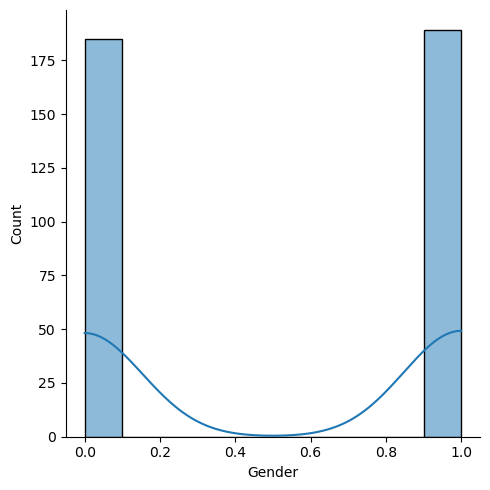

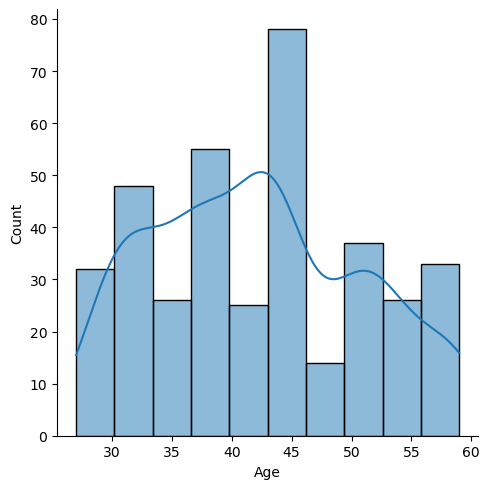

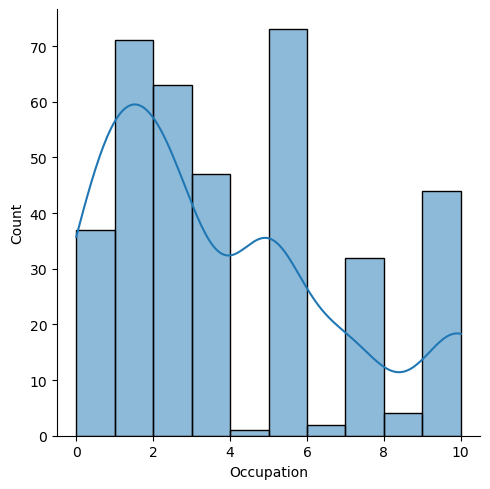

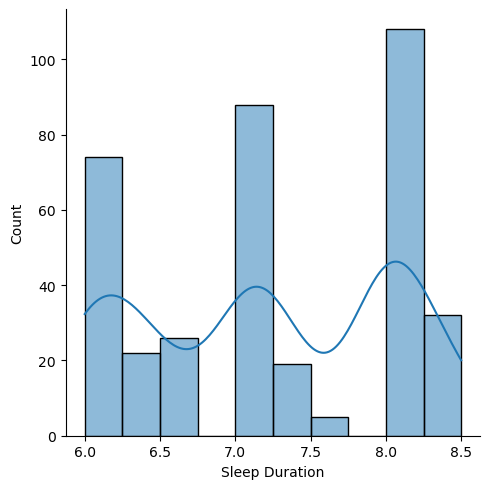

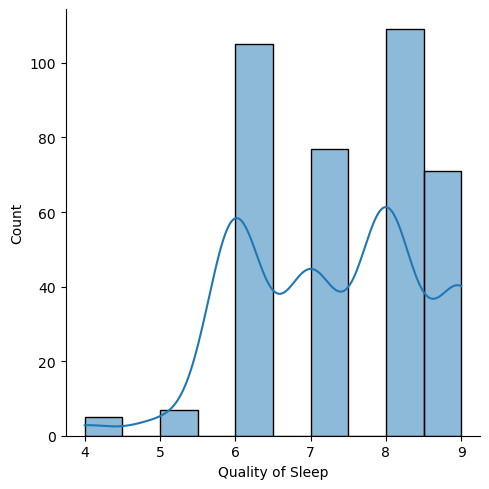

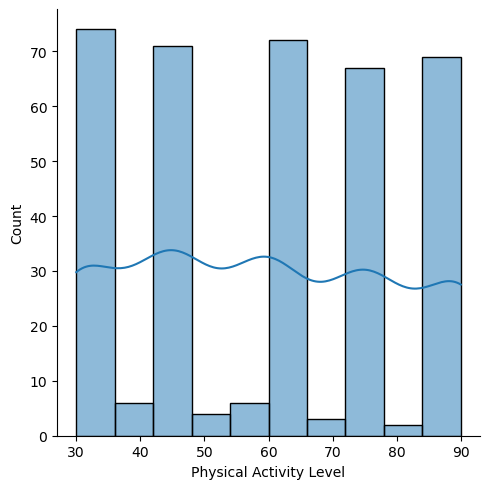

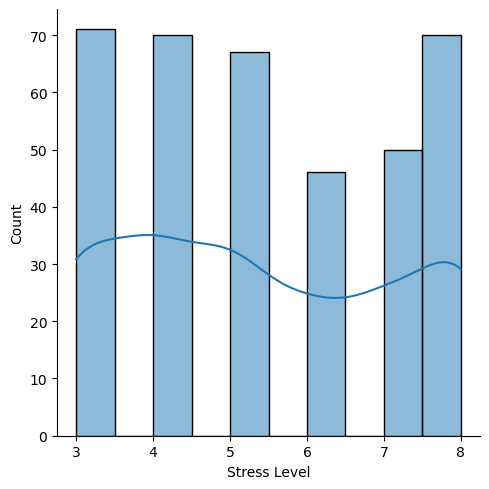

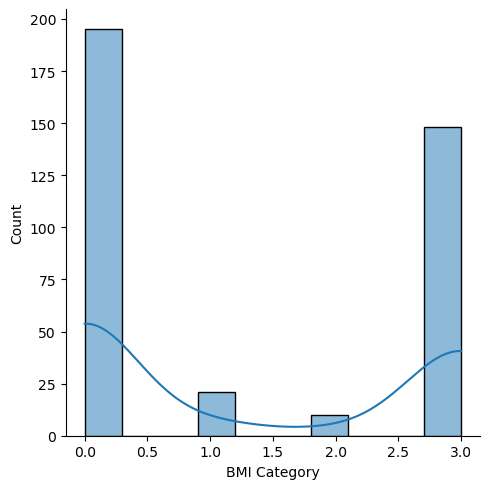

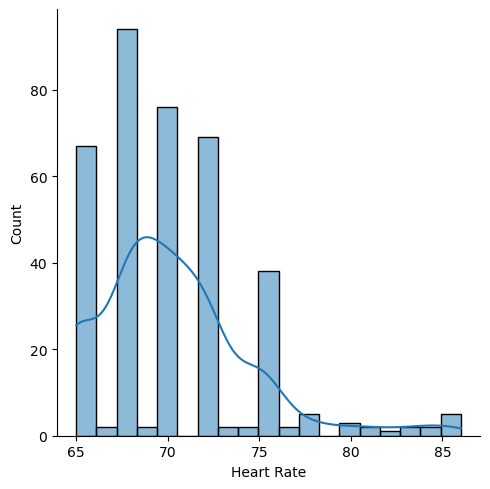

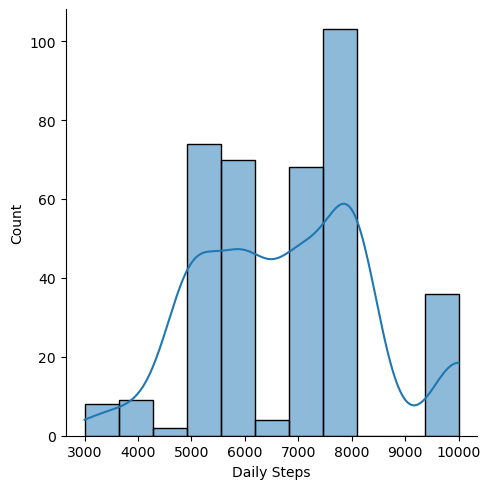

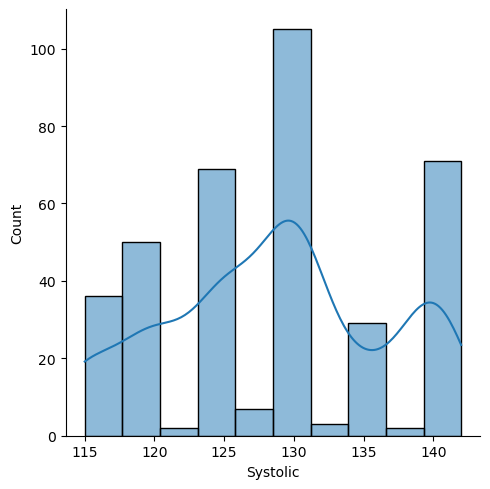

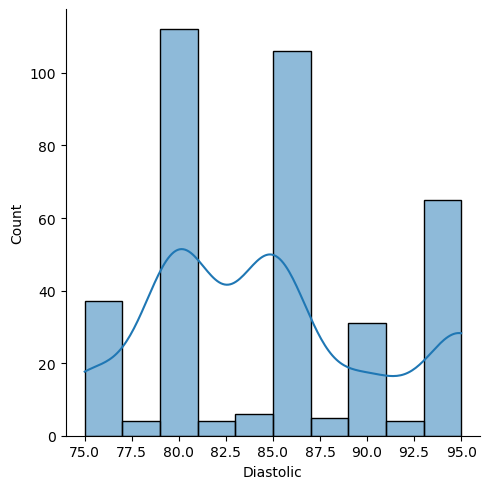

In [10]:
for i in var_imp.columns:
    sns.displot(df[i],kde=True)
    plt.show()

**Some variables look unbalanced and we can convert them.**

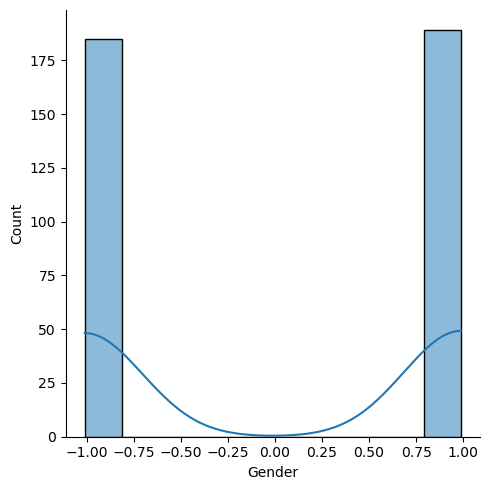

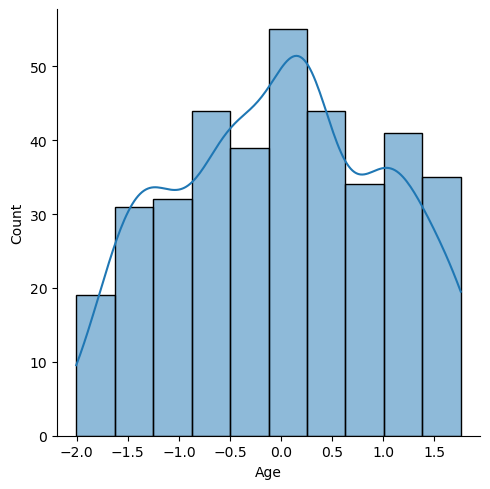

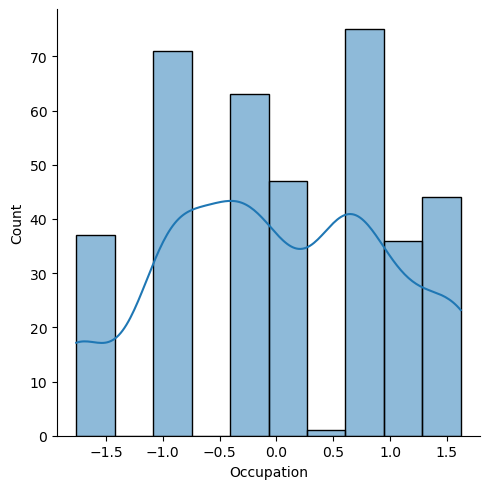

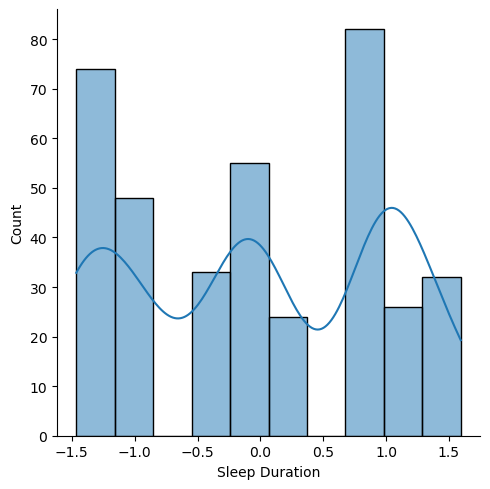

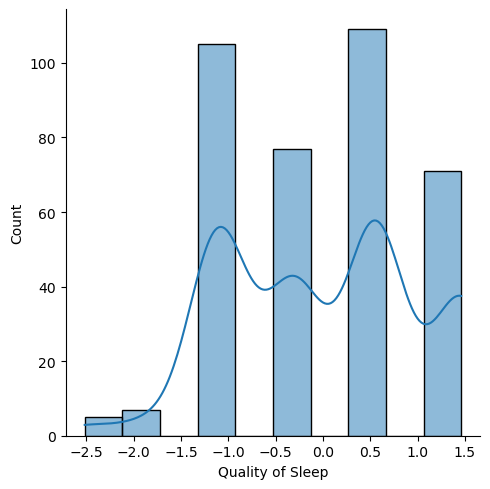

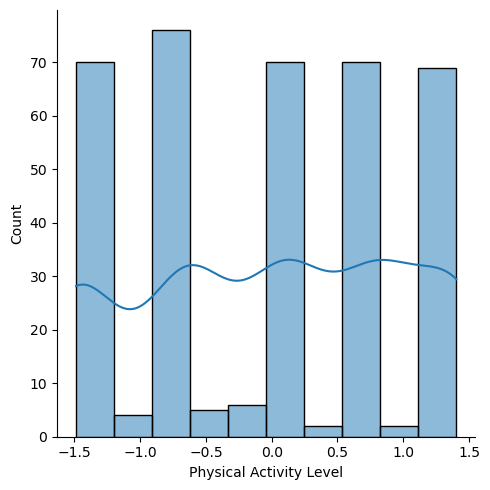

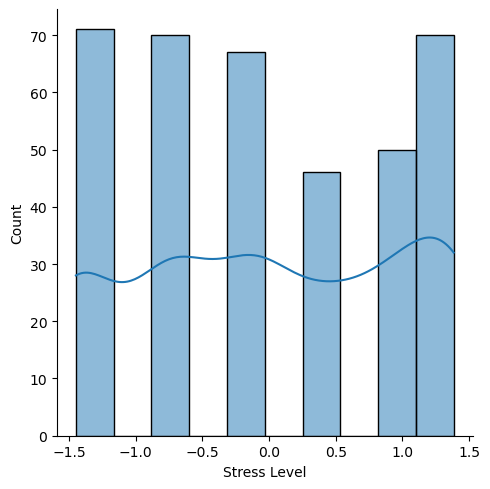

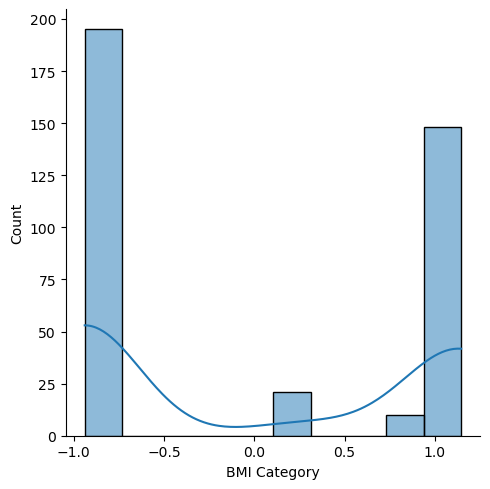

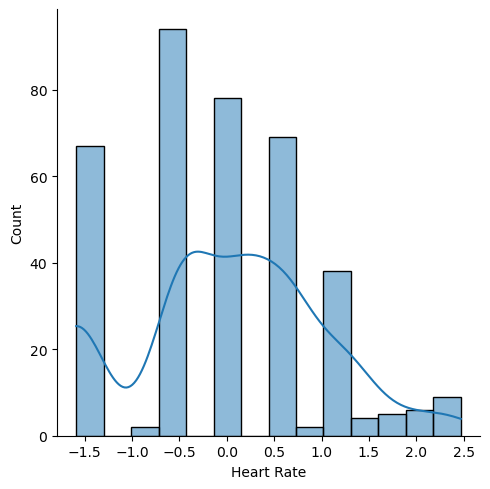

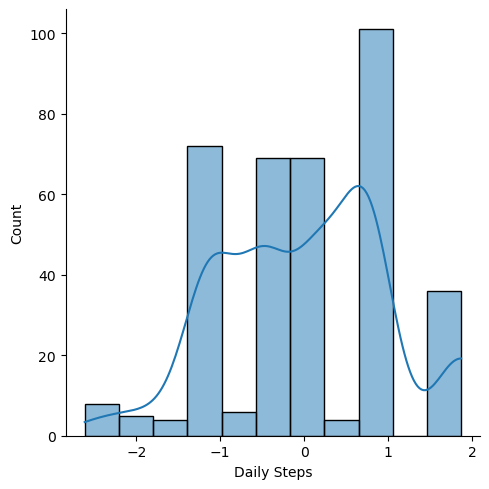

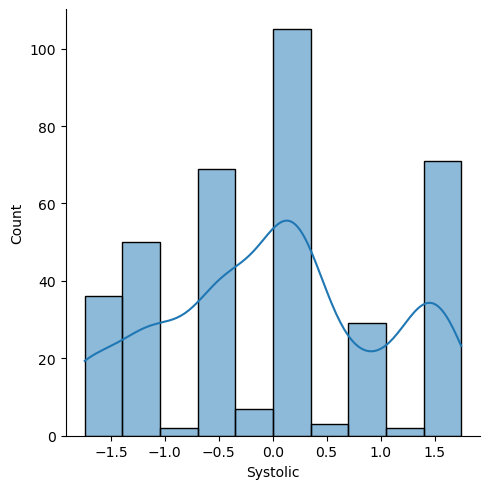

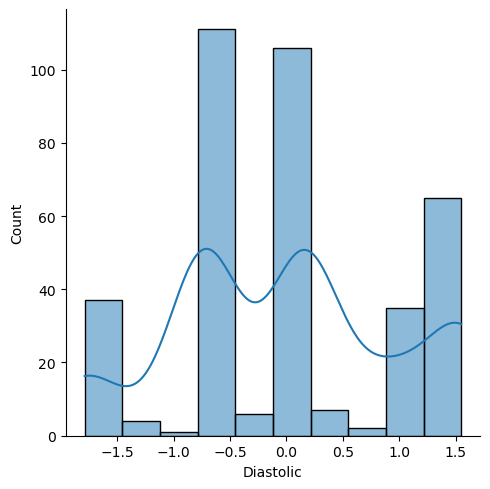

In [11]:
from sklearn.preprocessing import PowerTransformer

pt = PowerTransformer()

for i in var_imp.columns:
    df[i] = pt.fit_transform(df[i].values.reshape(-1,1))

for i in var_imp.columns:
    sns.displot(df[i],kde=True)
    plt.show()

**Better now.**

**We also need standardized data.**

In [12]:
var_imp_scale = StandardScaler().fit_transform(var_imp)

**We are ready for modeling.**

# Manual modeling


In [13]:
x_train,x_test,y_train,y_test = train_test_split(var_imp_scale,
                                                 var_obj,
                                                 test_size=0.2,
                                                 random_state=42)

**I will use several methods for modeling: logistic regression, random forest, XGBoost, etc. Besides that, I would like to try automatic modeling.**

## Logistic regression

In [14]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(x_train,y_train)
y_pred = lr.predict(x_test)

print('Original Logistic Regression Accuracy score: ',accuracy_score(y_test,y_pred))


Original Logistic Regression Accuracy score:  0.8933333333333333


In [15]:
from sklearn.model_selection import GridSearchCV

# grid search
param_grid_lr = {'C':[0.001,0.01,0.1,1,10,100,1000]}
grid_lr = GridSearchCV(LogisticRegression(),param_grid_lr,verbose=0)

grid_lr.fit(x_train,y_train)

y_pred = grid_lr.predict(x_test)

print('Ajusted Logistic Regression Accuracy score: ',accuracy_score(y_test,y_pred))


Ajusted Logistic Regression Accuracy score:  0.92


## XGBoost

In [16]:
# xgboost

from xgboost import XGBClassifier

xgb = XGBClassifier()
xgb.fit(x_train,y_train)
y_pred = xgb.predict(x_test)

print('Original Xgboost Accuracy score: ',accuracy_score(y_test,y_pred))

Original Xgboost Accuracy score:  0.9066666666666666


In [17]:
# grid search

param_grid_xgb = {'n_estimators':[100,300,500],
                'max_depth':[3,5,7],
                'learning_rate':[0.01,0.1,0.3],
                'min_child_weight':[1,3,5]
                }

grid_xgb = GridSearchCV(estimator=xgb,
                    param_grid=param_grid_xgb,
                    scoring='accuracy',
                    cv=5,
                    n_jobs=-1)

grid_xgb.fit(x_train,y_train)

y_pred = grid_xgb.predict(x_test)

print('Ajusted Xgboost Accuracy score: ',accuracy_score(y_test,y_pred))

Ajusted Xgboost Accuracy score:  0.88


## LightGBM

In [18]:
# lightgbm

from lightgbm import LGBMClassifier

lgb = LGBMClassifier()
lgb.fit(x_train,y_train)
y_pred = lgb.predict(x_test)

print('Original Lightgbm Accuracy score: ',accuracy_score(y_test,y_pred))

Original Lightgbm Accuracy score:  0.8933333333333333


In [19]:
# grid search

param_grid_lgbm = {'num_leaves': [7, 15, 31, 63, 127, 255, 511],
                'max_depth': [3, 5, 7, 9, 10]} 

grid_lgbm = GridSearchCV(lgb, param_grid_lgbm, cv=5, scoring='accuracy')

grid_lgbm.fit(x_train,y_train)

y_pred = grid_lgbm.predict(x_test)

print('Ajusted Lgbm Accuracy score: ',accuracy_score(y_test,y_pred))

Ajusted Lgbm Accuracy score:  0.88


## Catboost

In [20]:
# catboost

from catboost import CatBoostClassifier

cat = CatBoostClassifier()
cat.fit(x_train,y_train)
y_pred = cat.predict(x_test)

print('Catboost Accuracy score: ',accuracy_score(y_test,y_pred))

Learning rate set to 0.074402
0:	learn: 1.0205250	total: 53.8ms	remaining: 53.7s
1:	learn: 0.9455043	total: 54.6ms	remaining: 27.2s
2:	learn: 0.8825981	total: 55.4ms	remaining: 18.4s
3:	learn: 0.8320317	total: 56.2ms	remaining: 14s
4:	learn: 0.7855746	total: 57ms	remaining: 11.3s
5:	learn: 0.7451502	total: 57.8ms	remaining: 9.57s
6:	learn: 0.7076304	total: 58.5ms	remaining: 8.3s
7:	learn: 0.6710662	total: 59.3ms	remaining: 7.35s
8:	learn: 0.6421016	total: 60.1ms	remaining: 6.61s
9:	learn: 0.6130591	total: 60.6ms	remaining: 6s
10:	learn: 0.5884080	total: 61.4ms	remaining: 5.52s
11:	learn: 0.5675310	total: 62.3ms	remaining: 5.13s
12:	learn: 0.5446796	total: 63.2ms	remaining: 4.8s
13:	learn: 0.5248742	total: 64ms	remaining: 4.51s
14:	learn: 0.5067235	total: 64.9ms	remaining: 4.26s
15:	learn: 0.4895386	total: 65.7ms	remaining: 4.04s
16:	learn: 0.4753979	total: 66.5ms	remaining: 3.84s
17:	learn: 0.4632457	total: 67.2ms	remaining: 3.67s
18:	learn: 0.4493717	total: 67.9ms	remaining: 3.51s
19:

**With the basic manual modeling, we obtained a score of about 0.9. We will use automatic modeling and see if there is an improvement.**

# AutoML

**This is much more easier. We just need to feed the original data to the model. Don't forget to seprate train data and test data.**

In [21]:
# prepare datas

data_train = var_imp.merge(var_obj,left_index=True,right_index=True)

data_train.head()

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Systolic,Diastolic,Sleep Disorder
0,1,27,9,6.1,6,42,6,3,77,4200,126,83,1
1,1,28,1,6.2,6,60,8,0,75,10000,125,80,1
2,1,28,1,6.2,6,60,8,0,75,10000,125,80,1
3,1,28,6,6.0,4,30,8,2,85,3000,140,90,2
4,1,28,6,6.0,4,30,8,2,85,3000,140,90,2


In [22]:
x_train,x_test,y_train,y_test = train_test_split(data_train.drop('Sleep Disorder',axis=1),
                                                 data_train['Sleep Disorder'],
                                                 test_size=0.2,
                                                 random_state=42)

In [23]:
data_train = x_train.merge(y_train,left_index=True,right_index=True)

In [24]:
from autogluon.tabular import TabularDataset, TabularPredictor

train_data = TabularDataset(data_train)
label = 'Sleep Disorder'
predictor = TabularPredictor(label=label).fit(train_data)

predictor.leaderboard()

No path specified. Models will be saved in: "AutogluonModels/ag-20230703_163622/"
Beginning AutoGluon training ...
AutoGluon will save models to "AutogluonModels/ag-20230703_163622/"
AutoGluon Version:  0.8.2
Python Version:     3.10.10
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP Tue Jun 27 10:54:51 UTC 2023
Disk Space Avail:   20.94 GB / 20.96 GB (99.9%)
Train Data Rows:    299
Train Data Columns: 12
Label Column: Sleep Disorder
Preprocessing data ...
AutoGluon infers your prediction problem is: 'multiclass' (because dtype of label-column == int, but few unique label-values observed).
	3 unique label values:  [0, 1, 2]
	If 'multiclass' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])
Train Data Class Count: 3
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available M

                  model  score_val  pred_time_val  fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0              LightGBM   0.950000       0.002053  0.365515                0.002053           0.365515            1       True          5
1   WeightedEnsemble_L2   0.950000       0.002852  1.197156                0.000799           0.831641            2       True         14
2            LightGBMXT   0.933333       0.001915  0.333612                0.001915           0.333612            1       True          4
3       NeuralNetFastAI   0.933333       0.018116  3.427279                0.018116           3.427279            1       True          3
4              CatBoost   0.916667       0.001870  0.365527                0.001870           0.365527            1       True          8
5        NeuralNetTorch   0.916667       0.009008  0.607181                0.009008           0.607181            1       True         12
6         LightGBMLarge   0.900000

,model,score_val,pred_time_val,fit_time,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,LightGBM,0.950000,0.002053,0.365515,0.002053,0.365515,1,True,5
1,WeightedEnsemble_L2,0.950000,0.002852,1.197156,0.000799,0.831641,2,True,14
2,LightGBMXT,0.933333,0.001915,0.333612,0.001915,0.333612,1,True,4
3,NeuralNetFastAI,0.933333,0.018116,3.427279,0.018116,3.427279,1,True,3
4,CatBoost,0.916667,0.001870,0.365527,0.001870,0.365527,1,True,8
5,NeuralNetTorch,0.916667,0.009008,0.607181,0.009008,0.607181,1,True,12
6,LightGBMLarge,0.900000,0.002320,0.607921,0.002320,0.607921,1,True,13
7,XGBoost,0.900000,0.004671,0.250635,0.004671,0.250635,1,True,11
8,RandomForestEntr,0.900000,0.078995,0.777691,0.078995,0.777691,1,True,7
9,RandomForestGini,0.900000,0.080089,0.792635,0.080089,0.792635,1,True,6


In [25]:
predictor.evaluate_predictions(y_test,predictor.predict(x_test))


Evaluation: accuracy on test data: 0.88
Evaluations on test data:
{
    "accuracy": 0.88,
    "balanced_accuracy": 0.8255813953488372,
    "mcc": 0.7899588323987558
}


{'accuracy': 0.88,
 'balanced_accuracy': 0.8255813953488372,
 'mcc': 0.7899588323987558}

In [26]:
predictions = predictor.predict(x_test)

print('AutoML score:',accuracy_score(y_test,predictions))

confusion_matrix(y_test,predictions)

AutoML score: 0.88


array([[13,  1,  2],
       [ 1, 42,  0],
       [ 1,  4, 11]])

I'm glad to this little work will help you.